<a href="https://colab.research.google.com/github/lakigigar/BitsofDNA/blob/master/Citations_Analysis_of_Letter_Signatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates how to install and use sleuth for a differential analysis of RNA-seq data


In [3]:
system("date", intern=TRUE)

[1] "Fri Jan 17 22:19:11 UTC 2020"

In [4]:

library(readr)
library(dplyr)
library(ggplot2)
library(MASS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [5]:
system("wget https://raw.githubusercontent.com/joshp112358/Notices/master/withAMS.csv")
df <- read_csv("withAMS.csv")
system("wget https://raw.githubusercontent.com/joshp112358/Notices/master/From.csv")
df3 <- read_csv("From.csv")
df$age <- (2020- df$year)
df$citperyear <- df$citations/df$age
df$amscitperyear <- df$amscit/df$age
df$lettergroup <- as.factor(df$lettergroup)
df$gender <- as.factor(df$gender)
df$role <- as.factor(df$role)
df$highered <- as.factor(df$highered)
df$institution <- as.factor(df$institution)
df$research <- as.factor(df$research)
df$country <- as.factor(df$country)
df$security <- as.factor(df$security)
df$field <- as.factor(df$field)
df$simplefield <- as.factor(df$simplefield)
summary(df)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  name = col_character(),
  affiliation = col_character(),
  citations = col_double(),
  hindex = col_double(),
  year = col_double(),
  lettergroup = col_character(),
  gender = col_character(),
  highered = col_character(),
  institution = col_character(),
  research = col_character(),
  country = col_character(),
  role = col_character(),
  security = col_character(),
  field = col_character(),
  simplefield = col_character(),
  fellows = col_logical(),
  amscit = col_double(),
  Fields = col_character()
)

Parsed with column specification:
cols(
  Name = col_character(),
  From = col_character(),
  Institution = col_character(),
  Letter = col_character(),
  Gender = col_character(),
  Race = col_character(),
  URM = col_character(),
  Research = col_character(),
  Status = col_character(),
  security = col_character(),
  Field = col_character(),
  `AMS Citations

       X1             name           affiliation          citations    
 Min.   :   0.0   Length:1435        Length:1435        Min.   :    1  
 1st Qu.: 358.5   Class :character   Class :character   1st Qu.:  158  
 Median : 717.0   Mode  :character   Mode  :character   Median :  831  
 Mean   : 717.0                                         Mean   : 2796  
 3rd Qu.:1075.5                                         3rd Qu.: 2840  
 Max.   :1434.0                                         Max.   :71530  
                                                        NA's   :920    
     hindex            year       lettergroup        gender   
 Min.   :  1.00   Min.   :1957   A and B:  6   man      :969  
 1st Qu.:  6.00   1st Qu.:1984   A Only :615   nonbinary:  1  
 Median : 15.00   Median :1999   B and C: 74   woman    :452  
 Mean   : 18.45   Mean   :1996   B Only :600   NA's     : 13  
 3rd Qu.: 26.00   3rd Qu.:2009   C Only :134                  
 Max.   :106.00   Max.   :2019   NA's   :  6  

[1] 0.9218146

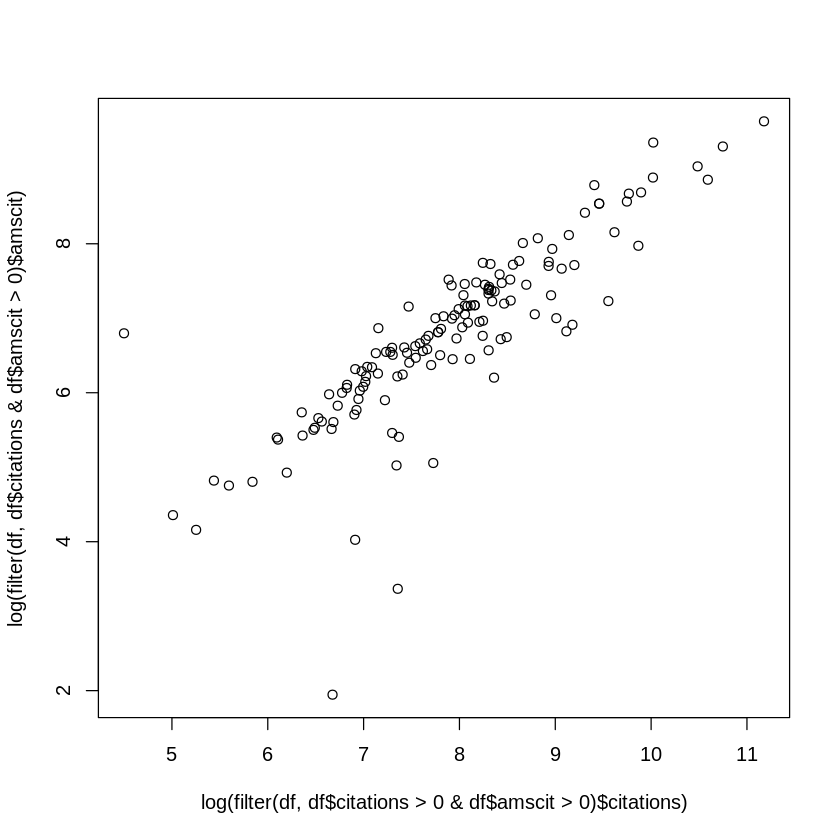

In [6]:
cor(filter(df,df$citations>0 & df$amscit >0)$citations,filter(df,df$citations & df$amscit>0)$amscit)
plot(log(filter(df,df$citations>0 & df$amscit >0)$citations),log(filter(df,df$citations & df$amscit>0)$amscit))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘visdat’, ‘viridis’, ‘UpSetR’




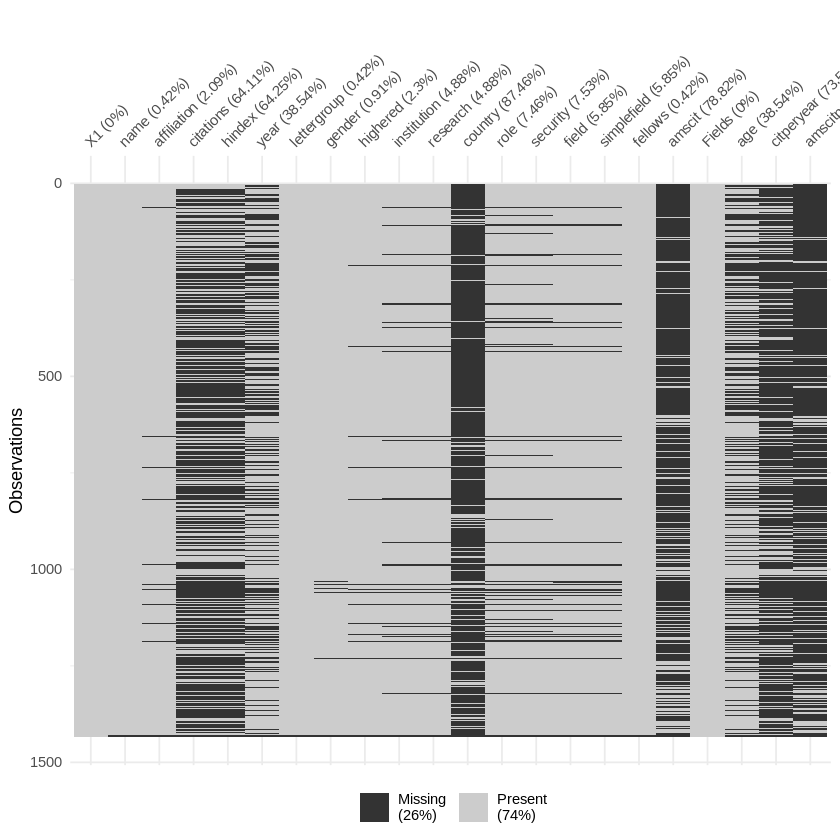

In [7]:
install.packages("naniar")
library(naniar)
vis_miss(df)

[1] 0.3645351

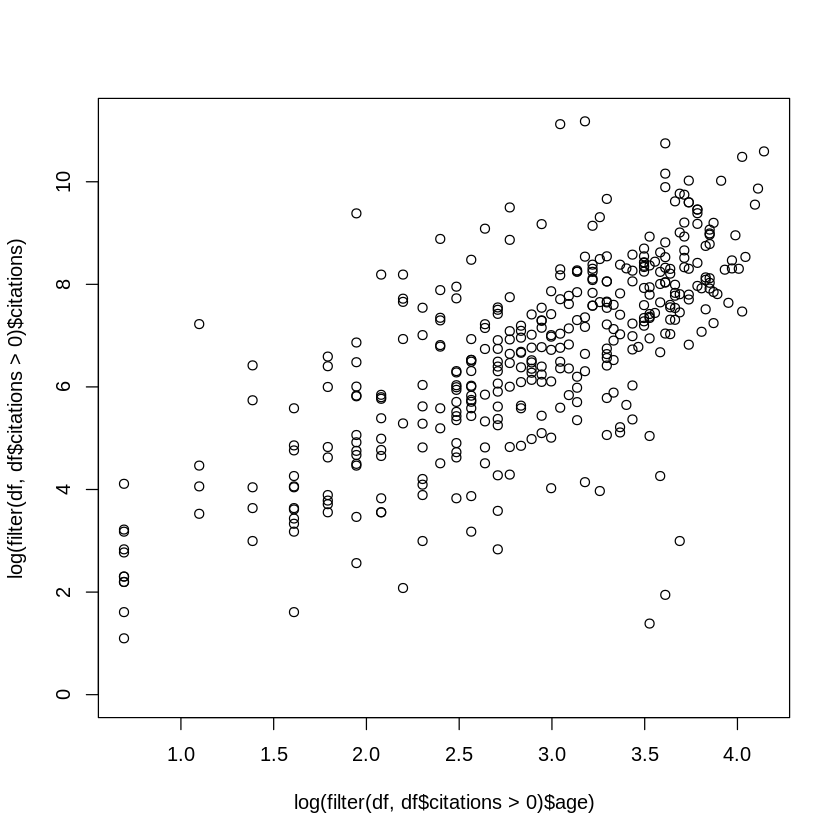

In [8]:
cor(filter(df,df$citations>0 & df$age>-1)$age,filter(df,df$citations>0 & df$age>-1)$citations)
plot(log(filter(df,df$citations>0)$age),log(filter(df,df$citations>0)$citations))

In [9]:
mean(filter(df,gender=="woman"&citations>-1&amscit>-1)$amscit)
mean(filter(df,gender=="woman"&is.na(df$citations)  & amscit>-1)$amscit)


mean(filter(df,gender=="man"&citations>-1&amscit>-1)$amscit)
mean(filter(df,gender=="man"&is.na(df$citations)  & amscit>-1)$amscit)


[1] 621.2174

[1] 897.913

[1] 1801.109

[1] 1816.41

In [10]:
mean(filter(df,gender=="woman" & age>-1)$age)
mean(filter(df,gender=="man" & age>-1)$age)



[1] 17.65574

[1] 26.32075

In [33]:
length(filter(df,gender=="woman"& amscit>-1)$amscit)
length(filter(df,gender=="woman")$age)



[1] 46

[1] 452

Warning message:
“Removed 290 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 237 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 33 rows containing non-finite values (stat_bin).”


[1] 14.6435

[1] 27.75621

[1] 35.48

[1] 13

[1] 27

[1] 37

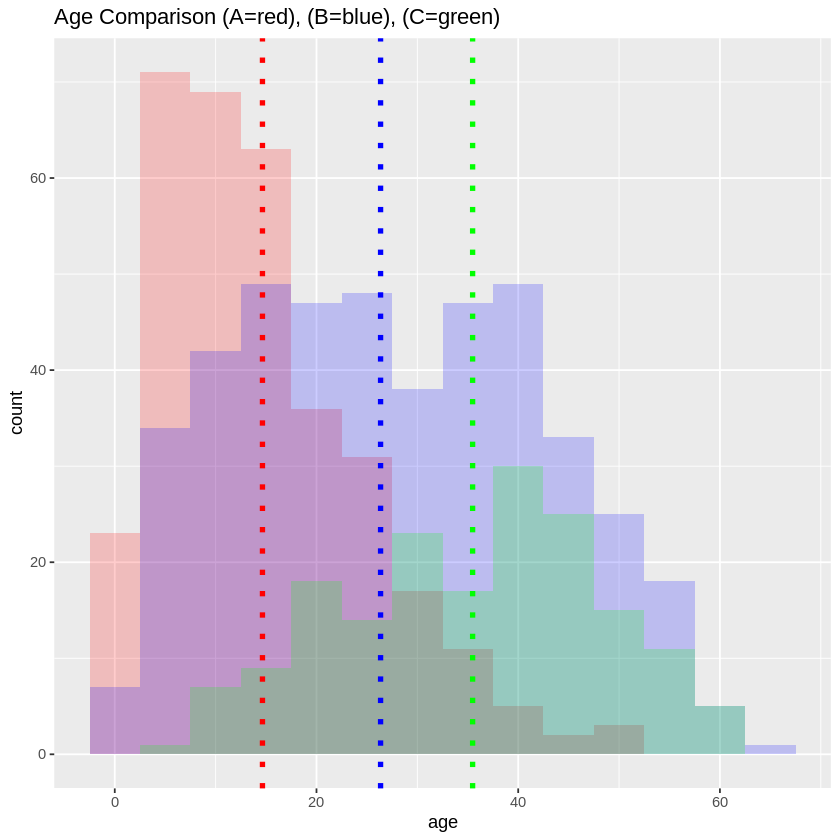

In [31]:
plot1 <- ggplot(df, aes(x=age))+
  geom_histogram(data=filter(df, (lettergroup == "A Only"|lettergroup == "A and B")),fill = "red", alpha = 0.2, binwidth = 5) + 
  geom_histogram(data=filter(df, (lettergroup == "B and C"|lettergroup == "B Only"|lettergroup == "A and B")),fill = "blue", alpha = 0.2, binwidth = 5) +
  geom_histogram(data=filter(df, (lettergroup == "C Only"|lettergroup == "B and C")),fill = "green", alpha = 0.2, binwidth = 5) +
  # Place dotted lines for mean values
  geom_vline(xintercept = mean(filter(df, (lettergroup == "A Only"|lettergroup == "A and B"))$age, na.rm = TRUE), linetype="dotted", color = "red", size=1.5) +
  geom_vline(xintercept = mean(filter(df, (lettergroup == "B Only"|lettergroup == "A and B"))$age, na.rm = TRUE), linetype="dotted", color = "blue", size=1.5) +
  geom_vline(xintercept = mean(filter(df, (lettergroup == "C Only"|lettergroup == "B and C"))$age, na.rm = TRUE), linetype="dotted", color = "green", size=1.5) +
  ggtitle("Age Comparison (A=red), (B=blue), (C=green)")
plot1

mean(filter(df, (lettergroup == "A Only"|lettergroup == "A and B"))$age, na.rm = TRUE)
mean(filter(df, (lettergroup == "B and C" | lettergroup == "B Only"|lettergroup == "A and B"))$age, na.rm = TRUE)
mean(filter(df, (lettergroup == "C Only"|lettergroup == "B and C"))$age, na.rm = TRUE)
median(filter(df, (lettergroup == "A Only"|lettergroup == "A and B"))$age, na.rm = TRUE)
median(filter(df, (lettergroup == "B and C"|lettergroup == "B Only"|lettergroup == "A and B"))$age, na.rm = TRUE)
median(filter(df, (lettergroup == "C Only"|lettergroup == "C and B"))$age, na.rm = TRUE)

Warning message:
“Removed 83 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 197 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 106 rows containing non-finite values (stat_bin).”


[1] 2397.75

[1] 4434.891

[1] 6226.816

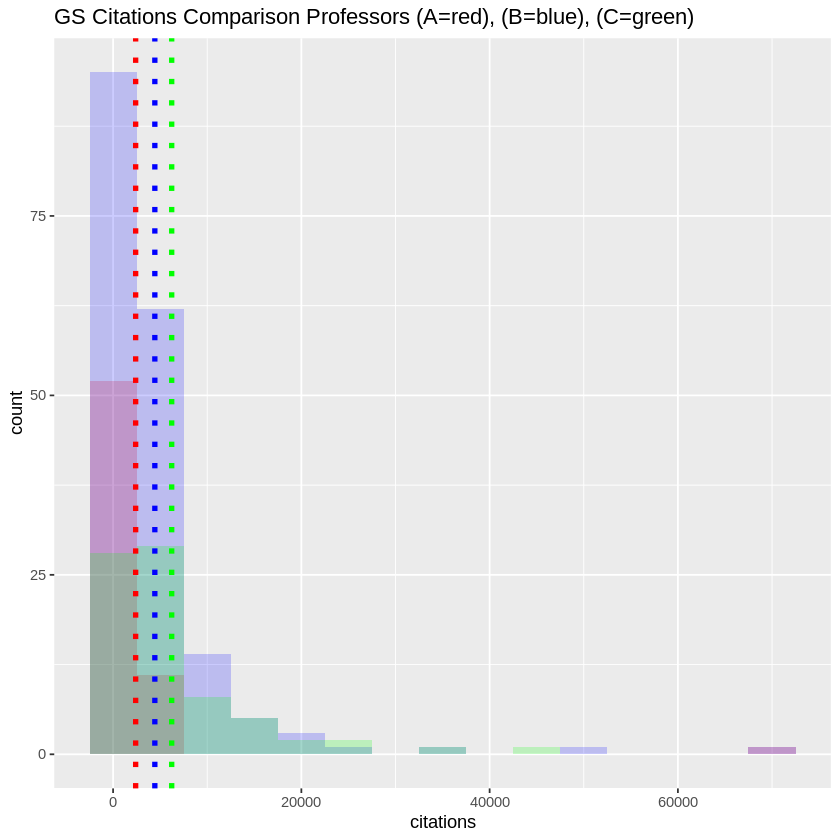

In [44]:
plot4 <- ggplot(df, aes(x=citations))+
  geom_histogram(data=filter(df, ((lettergroup == "A Only"|lettergroup == "A and B")&(role=="professor"))),fill = "red", alpha = 0.2, binwidth = 5000) + 
  geom_histogram(data=filter(df, ((lettergroup == "B and C"|lettergroup == "B Only"|lettergroup == "A and B")&(role=="professor"))),fill = "blue", alpha = 0.2, binwidth = 5000) +
  geom_histogram(data=filter(df,( (lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor"))),fill = "green", alpha = 0.2, binwidth = 5000) +
  geom_vline(xintercept = mean(filter(df, ((lettergroup == "A Only"|lettergroup == "A and B")&(role=="professor")))$citations, na.rm = TRUE), linetype="dotted", color = "red", size=1.5) +
  geom_vline(xintercept = mean(filter(df,( (lettergroup == "B Only"|lettergroup == "A and B"|lettergroup == "B and C")&(role=="professor")))$citations, na.rm = TRUE), linetype="dotted", color = "blue", size=1.5) +
  geom_vline(xintercept = mean(filter(df, ((lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor")))$citations, na.rm = TRUE), linetype="dotted", color = "green", size=1.5) +
  ggtitle("GS Citations Comparison Professors (A=red), (B=blue), (C=green)")
plot4

mean(filter(df, ((lettergroup == "A Only"|lettergroup == "A and B")&(role=="professor")))$citations, na.rm = TRUE)
mean(filter(df, ((lettergroup == "B Only"|lettergroup == "A and B"|lettergroup == "B and C")&(role=="professor")))$citations, na.rm = TRUE)
mean(filter(df, ((lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor")))$citations, na.rm = TRUE)


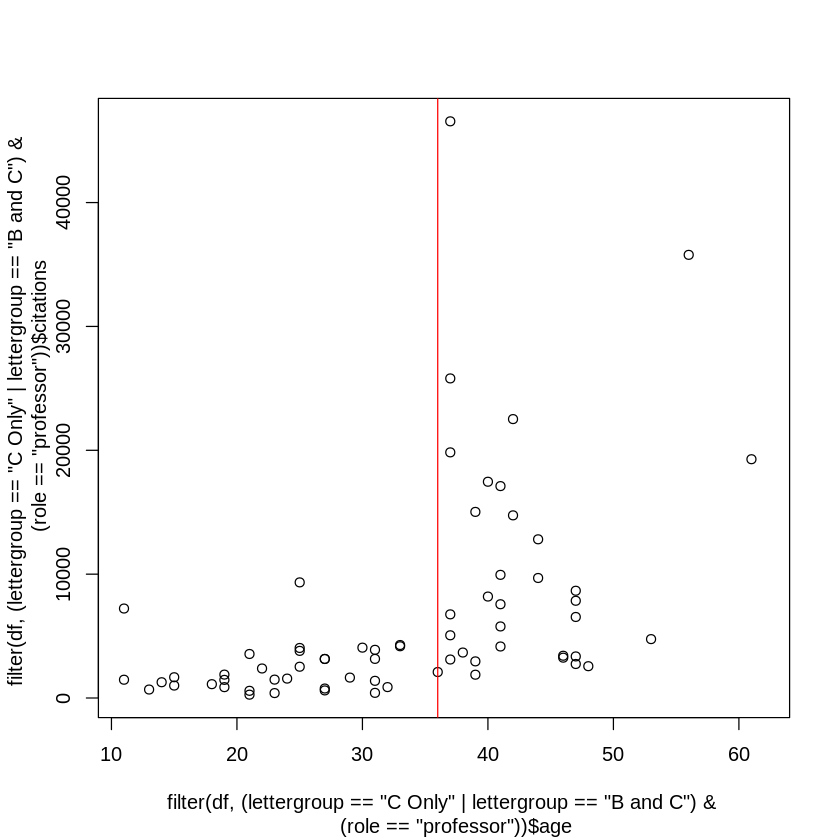

In [60]:
plot(filter(df,(lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor"))$age,filter(df,(lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor"))$citations)
abline(v=36,col="red")

Warning message:
“Removed 55 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 71 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 35 rows containing non-finite values (stat_bin).”


[1] 2922.723

[1] 3148.835

[1] 2358.853

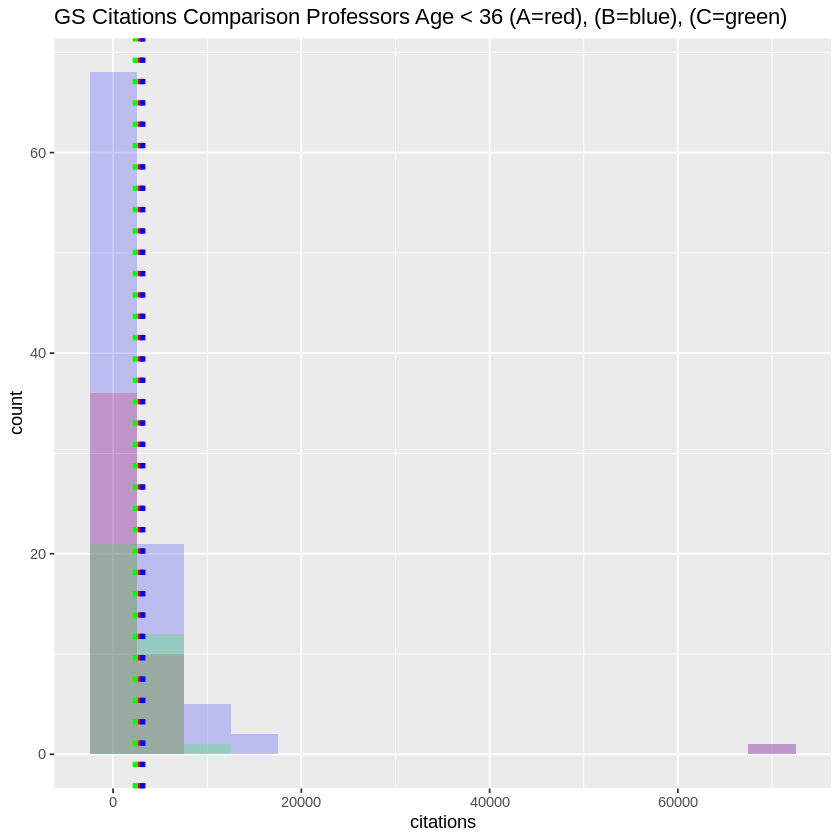

In [45]:
plot4 <- ggplot(df, aes(x=citations))+
  geom_histogram(data=filter(df, ((lettergroup == "A Only"|lettergroup == "A and B")&(role=="professor")&(age < 36))),fill = "red", alpha = 0.2, binwidth = 5000) + 
  geom_histogram(data=filter(df, ((lettergroup == "B and C"|lettergroup == "B Only"|lettergroup == "A and B")&(role=="professor")&(age < 36))),fill = "blue", alpha = 0.2, binwidth = 5000) +
  geom_histogram(data=filter(df,( (lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor")&(age < 36))),fill = "green", alpha = 0.2, binwidth = 5000) +
  geom_vline(xintercept = mean(filter(df, ((lettergroup == "A Only"|lettergroup == "A and B")&(role=="professor")&(age < 36)))$citations, na.rm = TRUE), linetype="dotted", color = "red", size=1.5) +
  geom_vline(xintercept = mean(filter(df,( (lettergroup == "B Only"|lettergroup == "A and B"|lettergroup == "B and C")&(role=="professor")&(age < 36)))$citations, na.rm = TRUE), linetype="dotted", color = "blue", size=1.5) +
  geom_vline(xintercept = mean(filter(df, ((lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor")&(age < 36)))$citations, na.rm = TRUE), linetype="dotted", color = "green", size=1.5) +
  ggtitle("GS Citations Comparison Professors Age < 36 (A=red), (B=blue), (C=green)")
plot4

mean(filter(df, ((lettergroup == "A Only"|lettergroup == "A and B")&(role=="professor")&(age < 36)))$citations, na.rm = TRUE)
mean(filter(df, ((lettergroup == "B Only"|lettergroup == "A and B"|lettergroup == "B and C")&(role=="professor")&(age < 36)))$citations, na.rm = TRUE)
mean(filter(df, ((lettergroup == "C Only"|lettergroup == "B and C")&(role=="professor")&(age < 36)))$citations, na.rm = TRUE)

